In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


In [2]:
# Dosya yolunu belirttim
file_path = r"C:\Users\Esmanur\Desktop\yangin_veri.csv"

# excel ; ayırıcı ile yükle
df = pd.read_csv(file_path, sep=';')

# İlk 5 satırı görüntülemek
df.head()


,Unnamed: 0,Yanan alan miktarı,Yangın sayısı,kasıt,Kasıt,İhmal-Kaza,İhmal-Kaza.1,Doğal,Doğal.1,Sebebi Bilinmeyen,Sebebi Bilinmeyen
0,Yıl,Hektar,Adet,Adet,Hektar,Adet,Hektar,Adet,Hektar,Adet,Hektar
1,1988,18 210,1 372,-,-,-,-,-,-,-,-
2,1989,13 099,1 633,-,-,-,-,-,-,-,-
3,1990,13 742,1 750,-,-,-,-,-,-,-,-
4,1991,8 081,1 481,-,-,-,-,-,-,-,-


In [3]:
# Yeniden yüklerken ilk satırı başlık yapmak için kullandım
df = pd.read_csv(file_path, sep=';', header=1)
df.head()


,Yıl,Hektar,Adet,Adet .1,Hektar .1,Adet .2,Hektar .2,Adet .3,Hektar .3,Adet .4,Hektar .4
0,1988,18 210,1 372,-,-,-,-,-,-,-,-
1,1989,13 099,1 633,-,-,-,-,-,-,-,-
2,1990,13 742,1 750,-,-,-,-,-,-,-,-
3,1991,8 081,1 481,-,-,-,-,-,-,-,-
4,1992,12 232,2 117,-,-,-,-,-,-,-,-


In [4]:
# Mevcut sütun isimlerini görüntülemek
print(df.columns)

# Daha anlamlı isimler vermke
df.columns = ['Yıl', 'Yanan Alan (hektar)', 'Yangın Sayısı', 
              'Kasıt Adet', 'Kasıt Hektar',
              'İhmal Adet', 'İhmal Hektar',
              'Doğal Adet', 'Doğal Hektar',
              'Bilinmeyen Adet', 'Bilinmeyen Hektar']

df.head()


Index(['Yıl  ', 'Hektar ', 'Adet           ', 'Adet           .1', 'Hektar .1',
       'Adet           .2', 'Hektar .2', 'Adet           .3', 'Hektar .3',
       'Adet           .4', 'Hektar .4'],
      dtype='object')


,Yıl,Yanan Alan (hektar),Yangın Sayısı,Kasıt Adet,Kasıt Hektar,İhmal Adet,İhmal Hektar,Doğal Adet,Doğal Hektar,Bilinmeyen Adet,Bilinmeyen Hektar
0,1988,18 210,1 372,-,-,-,-,-,-,-,-
1,1989,13 099,1 633,-,-,-,-,-,-,-,-
2,1990,13 742,1 750,-,-,-,-,-,-,-,-
3,1991,8 081,1 481,-,-,-,-,-,-,-,-
4,1992,12 232,2 117,-,-,-,-,-,-,-,-


In [5]:
for col in df.columns[1:]:
    df[col] = df[col].replace('-', '0')  # - işaretlerini 0 yap
    df[col] = df[col].str.replace(' ', '')  # boşlukları sil
    df[col] = pd.to_numeric(df[col], errors='coerce')  # sayıya çevir

# Yıl sütununu da integer yap
df['Yıl'] = pd.to_numeric(df['Yıl'], errors='coerce')

df.head()


,Yıl,Yanan Alan (hektar),Yangın Sayısı,Kasıt Adet,Kasıt Hektar,İhmal Adet,İhmal Hektar,Doğal Adet,Doğal Hektar,Bilinmeyen Adet,Bilinmeyen Hektar
0,1988,18210,1372,0,0,0,0,0,0,0,0
1,1989,13099,1633,0,0,0,0,0,0,0,0
2,1990,13742,1750,0,0,0,0,0,0,0,0
3,1991,8081,1481,0,0,0,0,0,0,0,0
4,1992,12232,2117,0,0,0,0,0,0,0,0


In [6]:
# Veri setinin genel bilgisi
df.info()

# Eksik değer kontrolü
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Yıl                  37 non-null     int64
 1   Yanan Alan (hektar)  37 non-null     int64
 2   Yangın Sayısı        37 non-null     int64
 3   Kasıt Adet           37 non-null     int64
 4   Kasıt Hektar         37 non-null     int64
 5   İhmal Adet           37 non-null     int64
 6   İhmal Hektar         37 non-null     int64
 7   Doğal Adet           37 non-null     int64
 8   Doğal Hektar         37 non-null     int64
 9   Bilinmeyen Adet      37 non-null     int64
 10  Bilinmeyen Hektar    37 non-null     int64
dtypes: int64(11)
memory usage: 3.3 KB


Yıl                    0
Yanan Alan (hektar)    0
Yangın Sayısı          0
Kasıt Adet             0
Kasıt Hektar           0
İhmal Adet             0
İhmal Hektar           0
Doğal Adet             0
Doğal Hektar           0
Bilinmeyen Adet        0
Bilinmeyen Hektar      0
dtype: int64

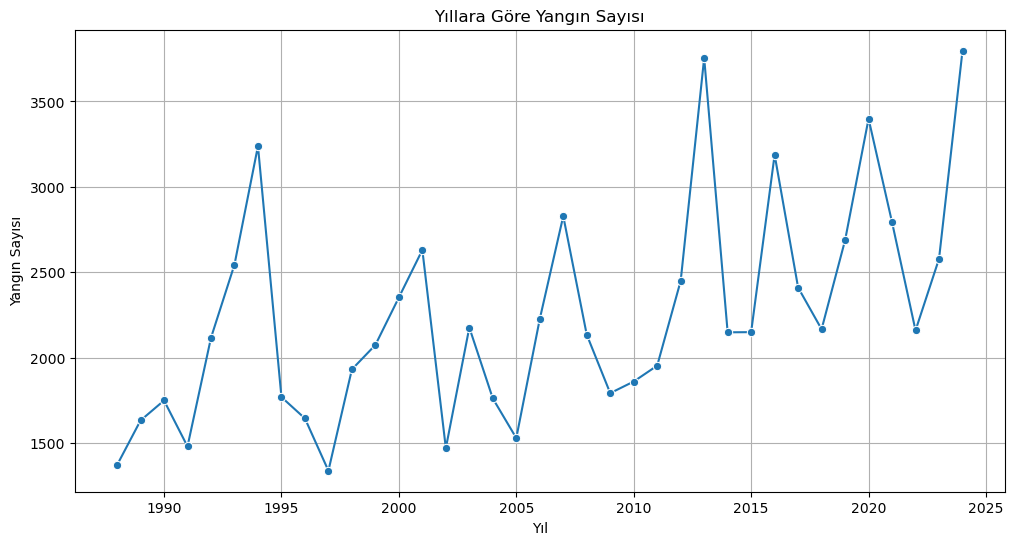

In [7]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Yıl', y='Yangın Sayısı', data=df, marker='o')
plt.title('Yıllara Göre Yangın Sayısı')
plt.xlabel('Yıl')
plt.ylabel('Yangın Sayısı')
plt.grid(True)
plt.show()


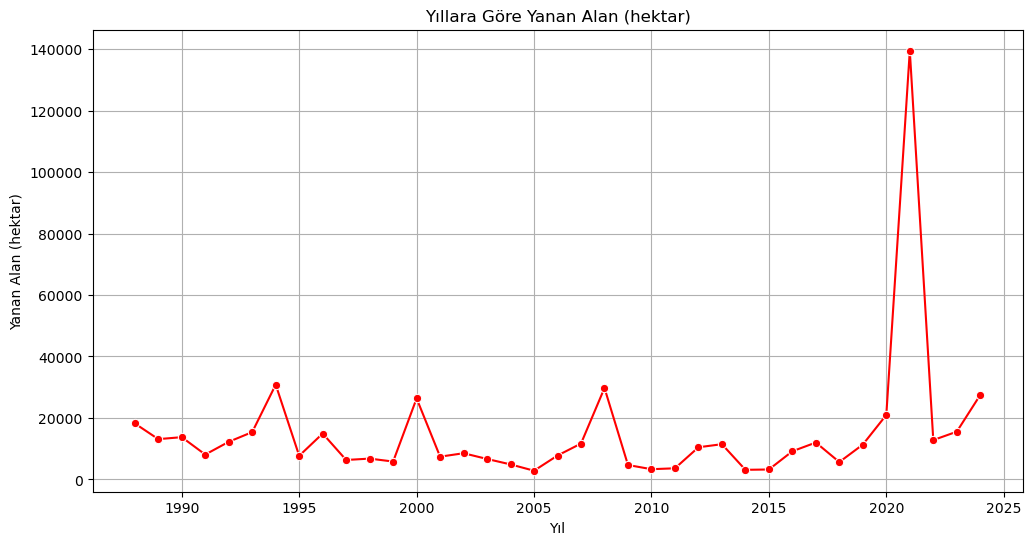

In [8]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Yıl', y='Yanan Alan (hektar)', data=df, marker='o', color='red')
plt.title('Yıllara Göre Yanan Alan (hektar)')
plt.xlabel('Yıl')
plt.ylabel('Yanan Alan (hektar)')
plt.grid(True)
plt.show()


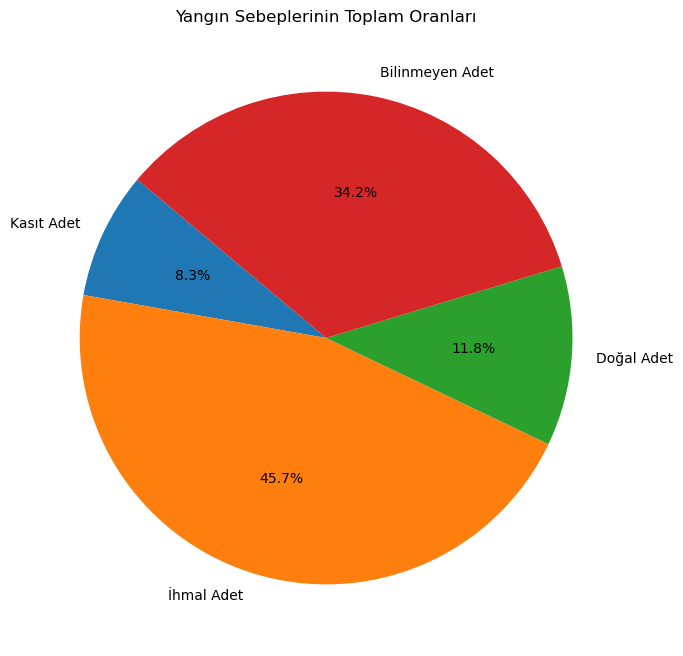

In [9]:
# Kasıt, İhmal, Doğal, Bilinmeyen toplam adetleri
kategoriler = ['Kasıt Adet', 'İhmal Adet', 'Doğal Adet', 'Bilinmeyen Adet']
toplamlar = df[kategoriler].sum()

# Pasta grafiği
plt.figure(figsize=(8,8))
plt.pie(toplamlar, labels=kategoriler, autopct='%1.1f%%', startangle=140)
plt.title('Yangın Sebeplerinin Toplam Oranları')
plt.show()


In [10]:
file_path = r"C:\Users\Esmanur\Desktop\il_veri.csv"
df = pd.read_csv(file_path, sep=';')
df.head()


,il,yangın adeti,yangın hektarı
0,Türkiye,3797,27485
1,İstanbul,76,21
2,Tekirdağ,20,7
3,Edirne,46,497
4,Kırklareli,24,80


In [11]:
print(df.columns)
df.columns = ['İl', 'Yangın Adedi', 'Yangın Hektarı']
df.head()


Index(['il', 'yangın adeti', 'yangın hektarı'], dtype='object')


,İl,Yangın Adedi,Yangın Hektarı
0,Türkiye,3797,27485
1,İstanbul,76,21
2,Tekirdağ,20,7
3,Edirne,46,497
4,Kırklareli,24,80


In [12]:
df.info()
df['Yangın Adedi'] = pd.to_numeric(df['Yangın Adedi'], errors='coerce')
df['Yangın Hektarı'] = pd.to_numeric(df['Yangın Hektarı'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   İl              82 non-null     object
 1   Yangın Adedi    82 non-null     object
 2   Yangın Hektarı  82 non-null     object
dtypes: object(3)
memory usage: 2.1+ KB


In [13]:
#Veri setindeki sütünlardaki NaN değer sayısı.
df.isnull().sum()


İl                0
Yangın Adedi      4
Yangın Hektarı    7
dtype: int64

In [14]:
# Veri setindeki verilerin toplam değerleri
# Türkiye dışındaki tüm satırları seç
df = df[df['İl'] != 'Türkiye']
print("Toplam yangın adedi:", df['Yangın Adedi'].sum())
print("Toplam yanan alan (hektar):", df['Yangın Hektarı'].sum())


Toplam yangın adedi: 3797.0
Toplam yanan alan (hektar): 27485.0


In [15]:
# Veri setindeki Türkiye verisi hariç diğer illerin en çok yangın çıkan 10 il sıralaması.
df = df[df['İl'] != 'Türkiye']
df_sorted = df.sort_values(by='Yangın Adedi', ascending=False)
df_sorted.head(10)


,İl,Yangın Adedi,Yangın Hektarı
10,Muğla,296.0,1698.0
26,Antalya,276.0,339.0
11,Manisa,205.0,4803.0
7,İzmir,196.0,4378.0
32,Kahramanmaraş,182.0,844.0
6,Çanakkale,124.0,1706.0
13,Kütahya,115.0,121.0
30,Mersin,107.0,69.0
29,Adana,104.0,114.0
5,Balıkesir,102.0,260.0


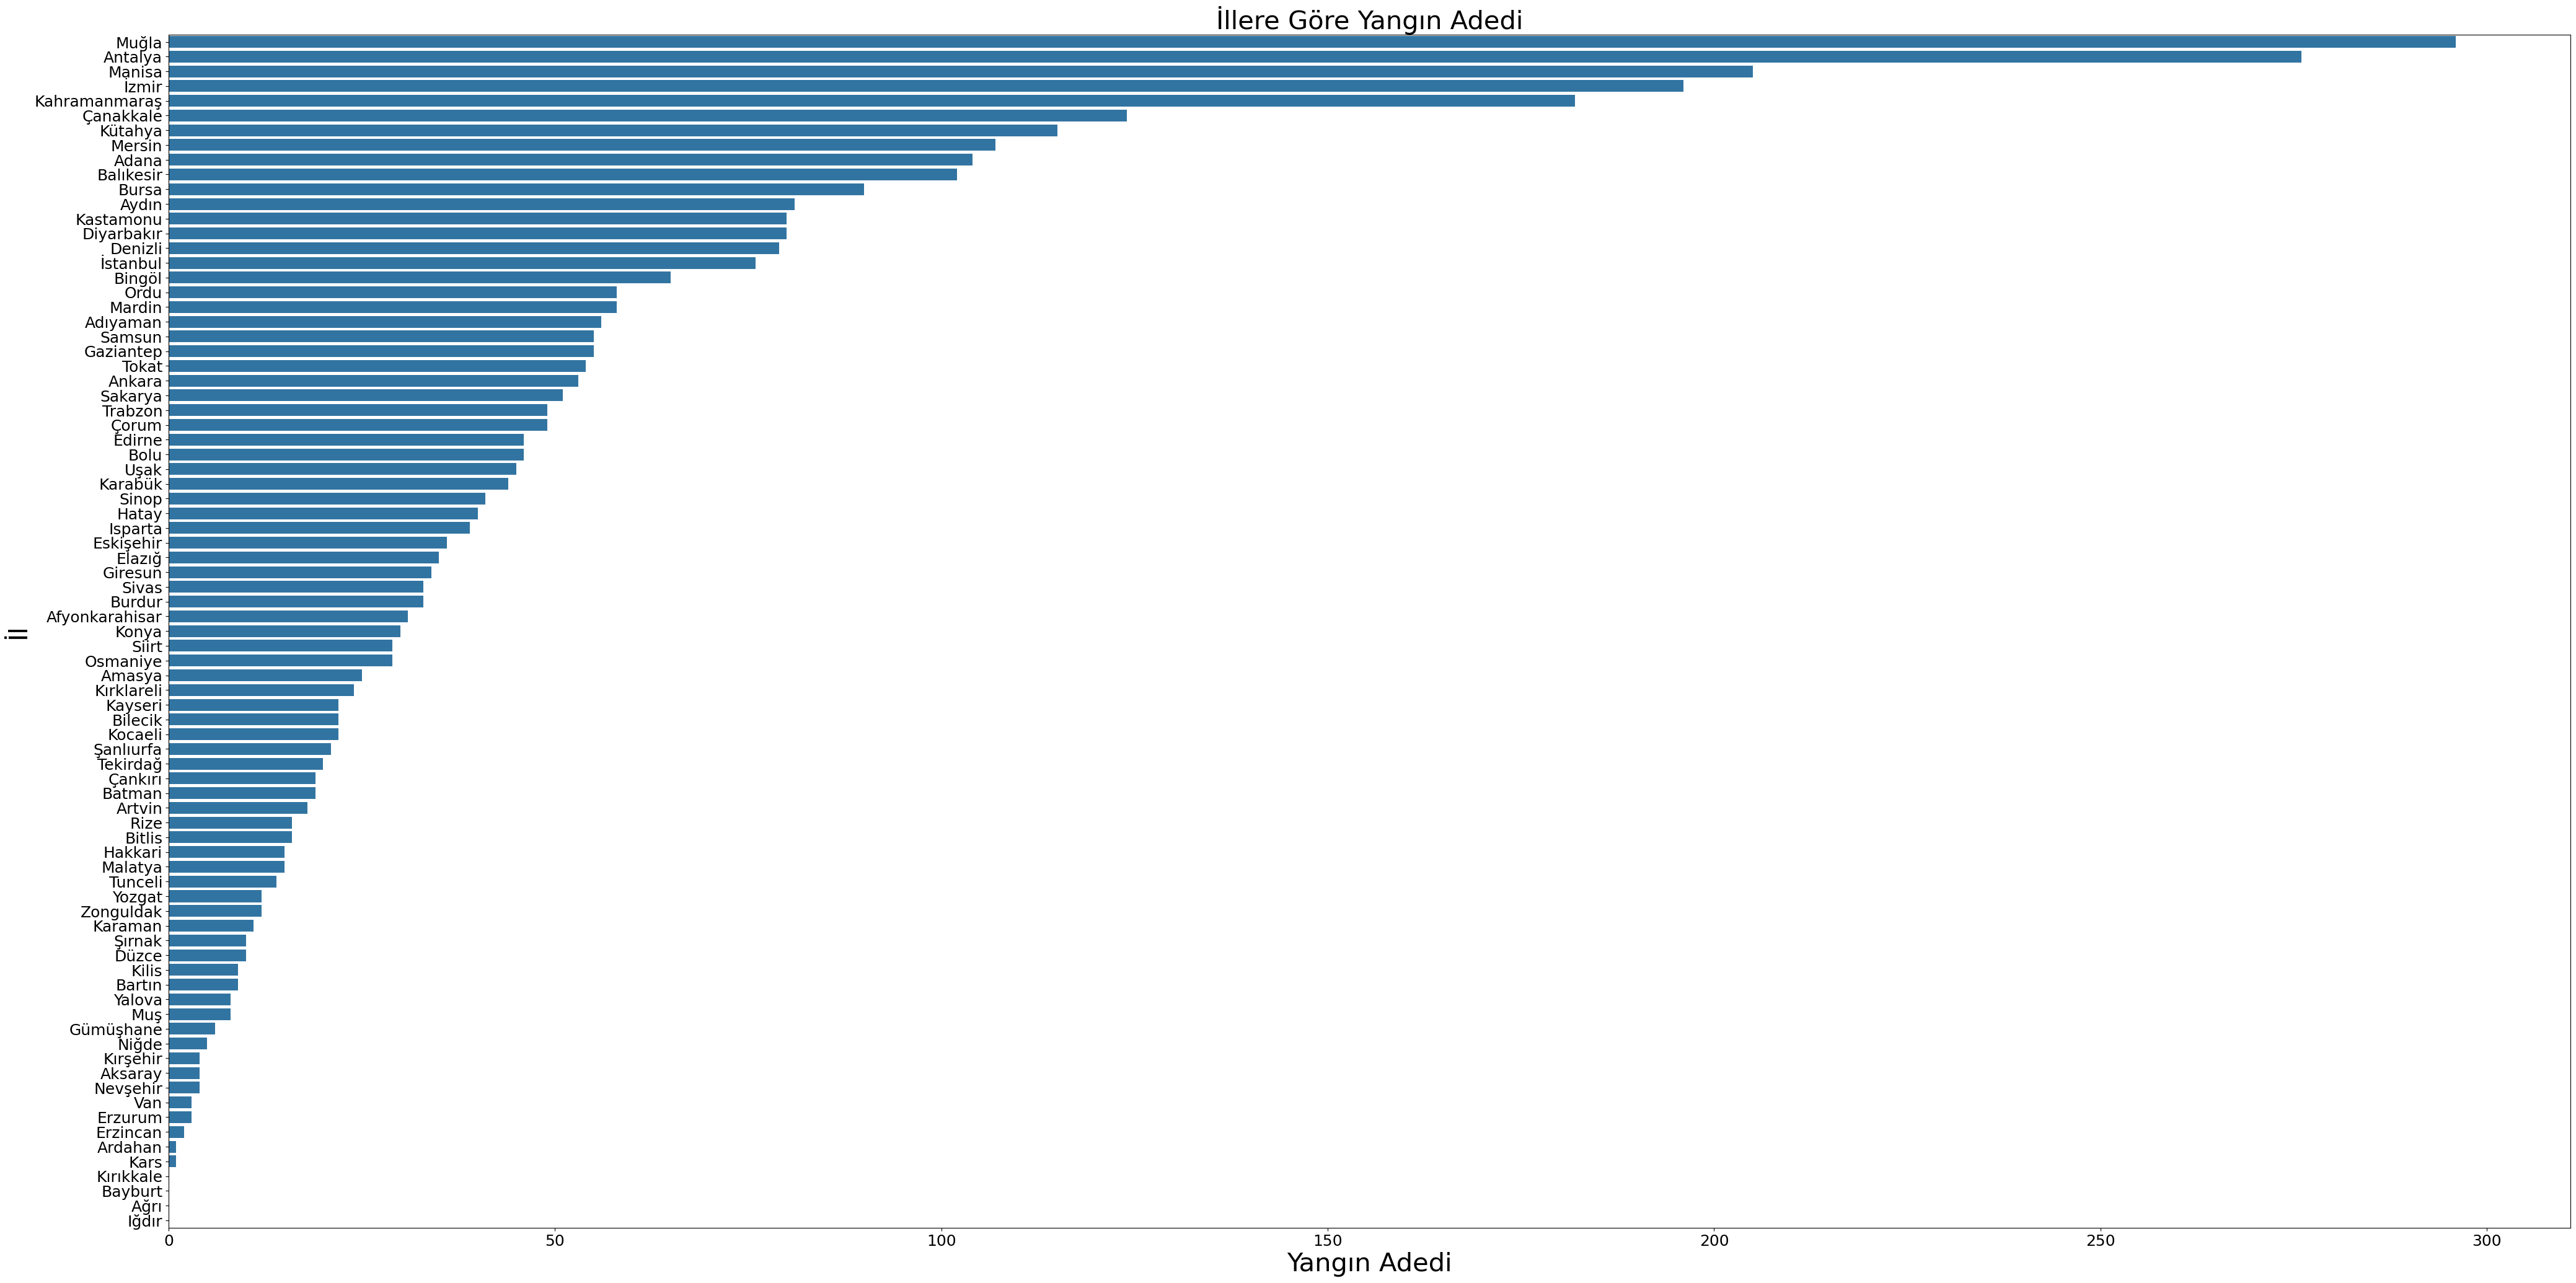

In [16]:
df = df[df['İl'] != 'Türkiye']
plt.figure(figsize=(50,25))
sns.barplot(x='Yangın Adedi', y='İl', data=df.sort_values('Yangın Adedi', ascending=False))
plt.title('İllere Göre Yangın Adedi', fontsize=30)
plt.xlabel('Yangın Adedi', fontsize=30)
plt.ylabel('İl', fontsize=30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()


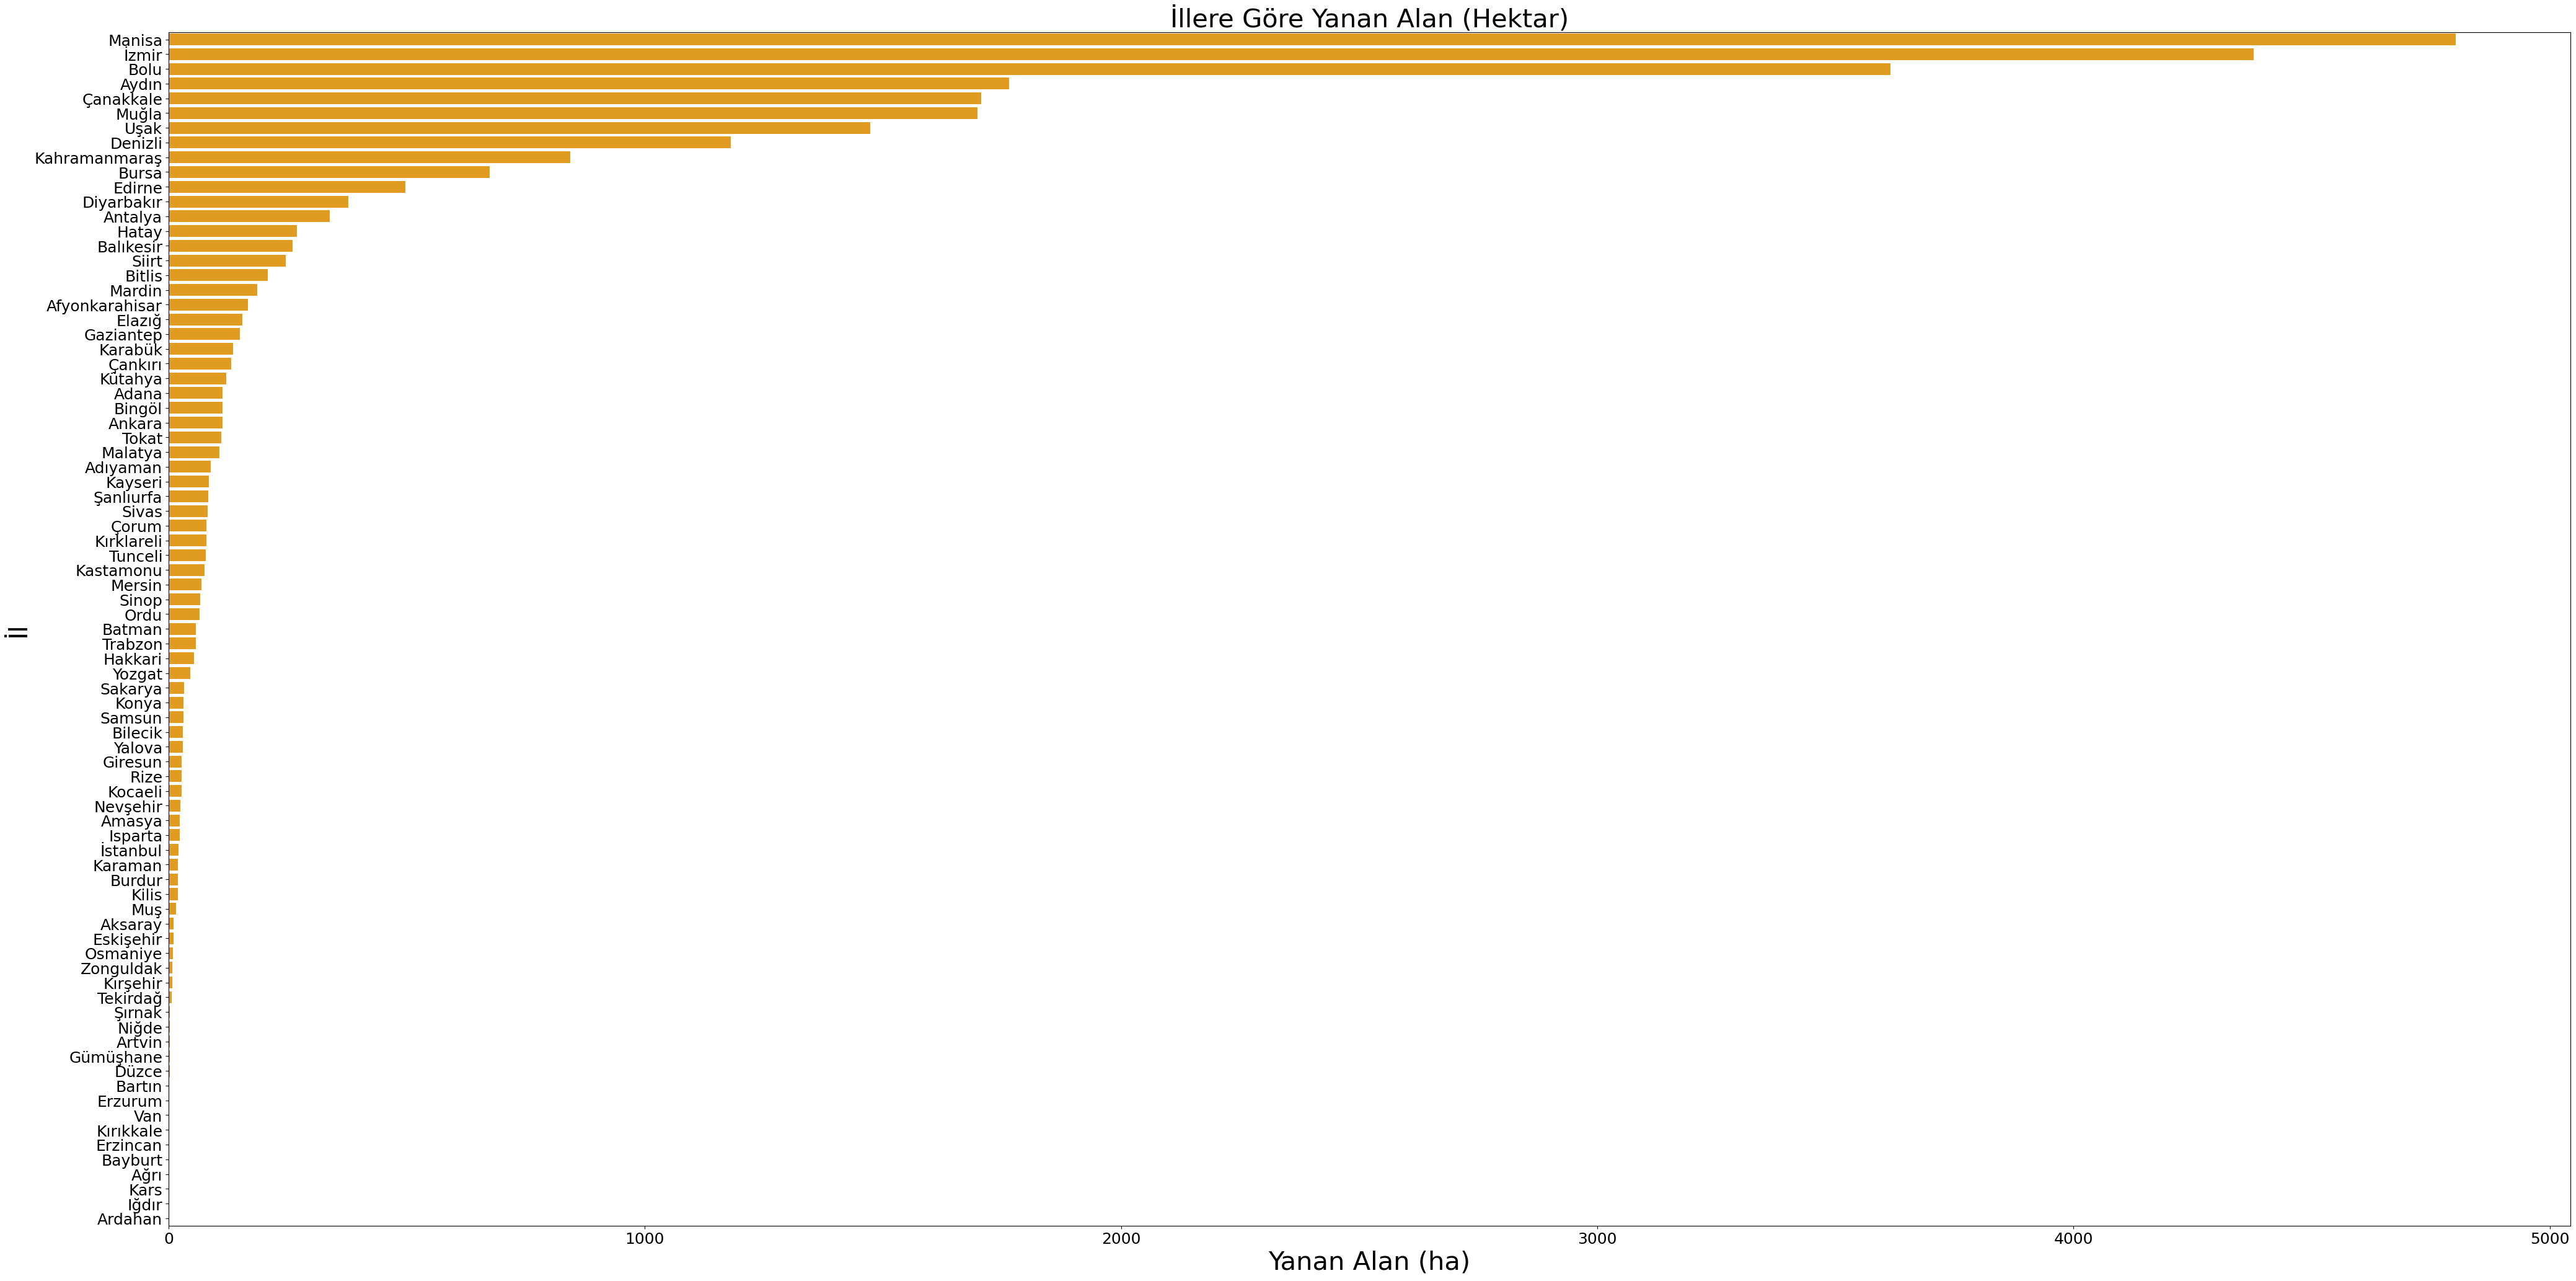

In [18]:
df = df[df['İl'] != 'Türkiye']
plt.figure(figsize=(50,25))
sns.barplot(x='Yangın Hektarı', y='İl', data=df.sort_values('Yangın Hektarı', ascending=False), color='orange')
plt.title('İllere Göre Yanan Alan (Hektar)', fontsize=30)
plt.xlabel('Yanan Alan (ha)', fontsize=30)
plt.ylabel('İl', fontsize=30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()


In [19]:
file_path = r"C:\Users\Esmanur\Desktop\agac_tur.csv"
df = pd.read_csv(file_path, sep=';')
df.head()

,İl,1,2,3
0,Adana,Kızılçam,Meşe,Zeytin
1,Adıyaman,Meşe,Ardıç,Karaçam
2,Afyonkarahisar,Karaçam,Sedir,Meşe
3,Ağrı,Sarıçam,Huş,Ardıç
4,Amasya,Kayın,Göknar,Kestane


In [20]:
# 1 2 ve 3. sütunlardaki ağaç türlerini birleştir
all_trees = pd.concat([df["1"], df["2"], df["3"]])

unique_trees = all_trees.unique()
print(f"Toplam {len(unique_trees)} farklı ağaç türü önerilmiş.")
print(unique_trees)


Toplam 13 farklı ağaç türü önerilmiş.
['Kızılçam' 'Meşe' 'Karaçam' 'Sarıçam' 'Kayın' 'Ladin' 'Ardıç' 'Sedir'
 'Huş' 'Göknar' 'Zeytin' 'Kestane' 'Gürgen']


In [21]:
tree_counts = all_trees.value_counts()

# En çok önerilen 10 ağaç türü
tree_counts.head(10)


Meşe        42
Karaçam     28
Ardıç       27
Kayın       26
Kızılçam    14
Sedir       14
Zeytin      14
Sarıçam     13
Ladin       13
Huş         13
Name: count, dtype: int64

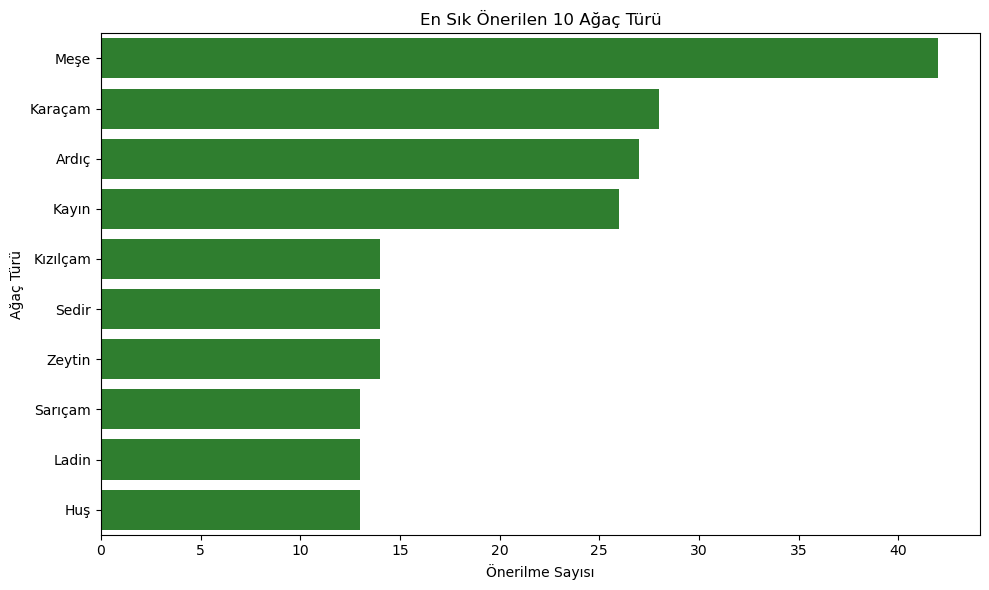

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=tree_counts.head(10).values,
    y=tree_counts.head(10).index,
    color="forestgreen"  # Tek renk için color kullanılır
)
plt.title("En Sık Önerilen 10 Ağaç Türü")
plt.xlabel("Önerilme Sayısı")
plt.ylabel("Ağaç Türü")
plt.tight_layout()
plt.show()


In [24]:
# Her sütundaki türleri ayrı ayrı say
birinci = df["1"].value_counts()
ikinci = df["2"].value_counts()
ucuncu = df["3"].value_counts()

# Hepsini tablo halinde birleştir
siralama_df = pd.DataFrame({
    "1. sırada": birinci,
    "2. sırada": ikinci,
    "3. sırada": ucuncu
}).fillna(0).astype(int)

siralama_df.head(10)


,1. sırada,2. sırada,3. sırada
Ardıç,0,14,13
Göknar,0,13,0
Gürgen,0,0,13
Huş,0,13,0
Karaçam,14,0,14
Kayın,13,13,0
Kestane,0,0,13
Kızılçam,14,0,0
Ladin,13,0,0
Meşe,14,14,14


In [26]:
def agac_onerileri(il_adi):
    il_adi = il_adi.strip().upper()
    df["il_upper"] = df["İl"].str.upper().str.strip()  # Büyük İ harfi önemli
    
    satir = df[df["il_upper"] == il_adi]
    
    if satir.empty:
        print(f"{il_adi} için veri bulunamadı.")
    else:
        agaclar = satir.iloc[0][["1", "2", "3"]].tolist()
        print(f"{satir.iloc[0]['İl']} ilinde önerilen ağaç türleri:")
        for i, agac in enumerate(agaclar, 1):
            print(f"{i}. {agac}")


kullanici_girdisi = input("İl ismi giriniz: ")
agac_onerileri(kullanici_girdisi)


İl ismi giriniz:  yozgat


Yozgat ilinde önerilen ağaç türleri:
1. Ladin
2. Kayın
3. Gürgen
